# **Ex1 - Unsupervised learning**

## Names and IDs

1.   2.   

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [2]:
# load the data
url = 'https://raw.githubusercontent.com/MichaelLurye/Mall_Customers_dataset/main/customer_segmentation.csv'
df = pd.read_csv(url)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


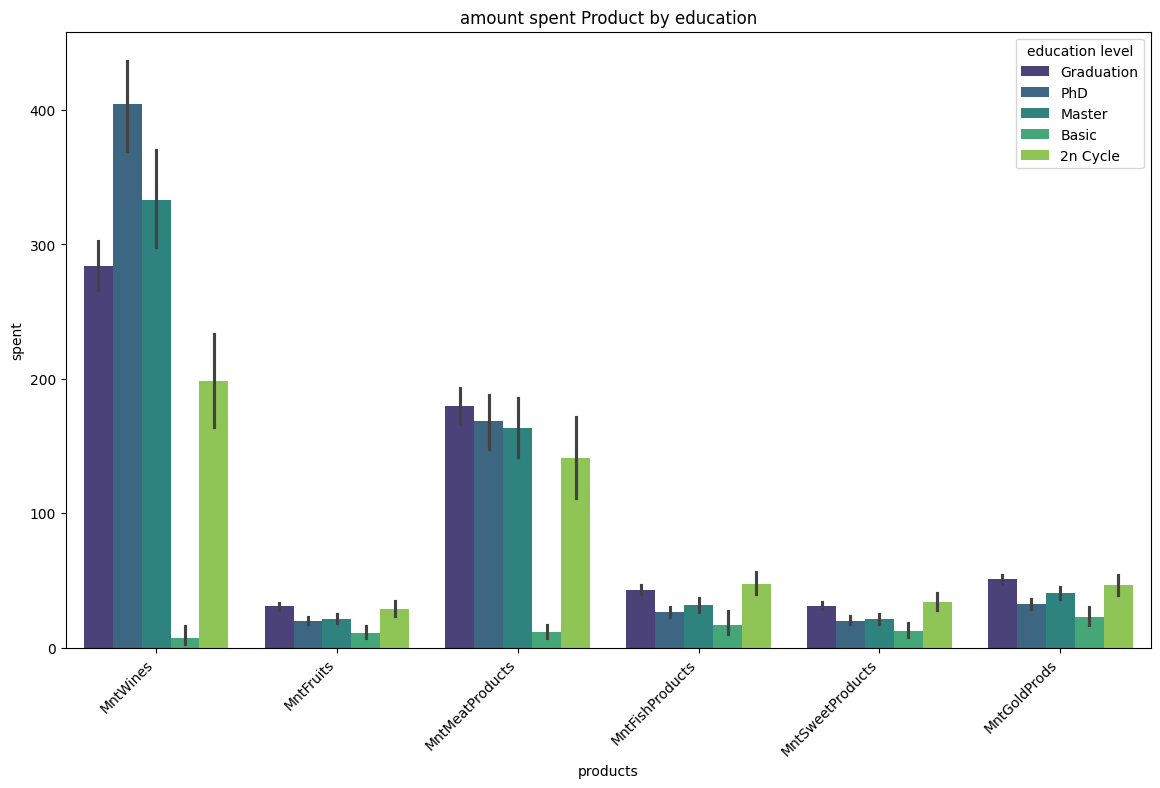

In [3]:
# Graph 1 -
plt.figure(figsize=(14, 8))


product_columns = ['MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df_products_education = df[product_columns + ['Education']]
df1= pd.melt(df_products_education, id_vars=['Education'], value_vars=product_columns, var_name='Product', value_name='Amount')
sns.barplot(x='Product', y='Amount', hue='Education', data=df1, palette='viridis')
plt.title('amount spent on product by education')
plt.xlabel('products')
plt.ylabel('spent')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'education level')

plt.show()

**Insight** - we can see that wine is the most sold item and fruits is the least sold(in terms of money spent on product) \
also we can see that in each category, the basic education group spent the least amount of money

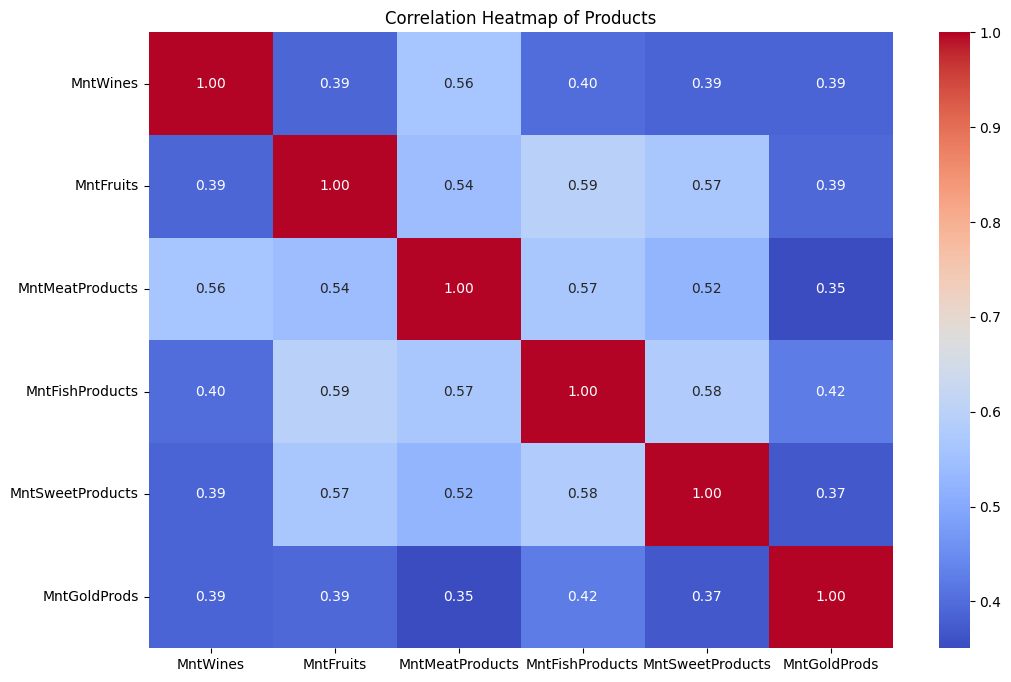

In [4]:
# Graph 2 -

import matplotlib.pyplot as plt
import seaborn as sns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_products = df[product_columns]
correlation_matrix = df_products.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Products')
plt.show()


**Insight** - we can see that the products aren't very corelated but meat has the highest corelation with each product. that means that there is no specipic pattern in shoping.

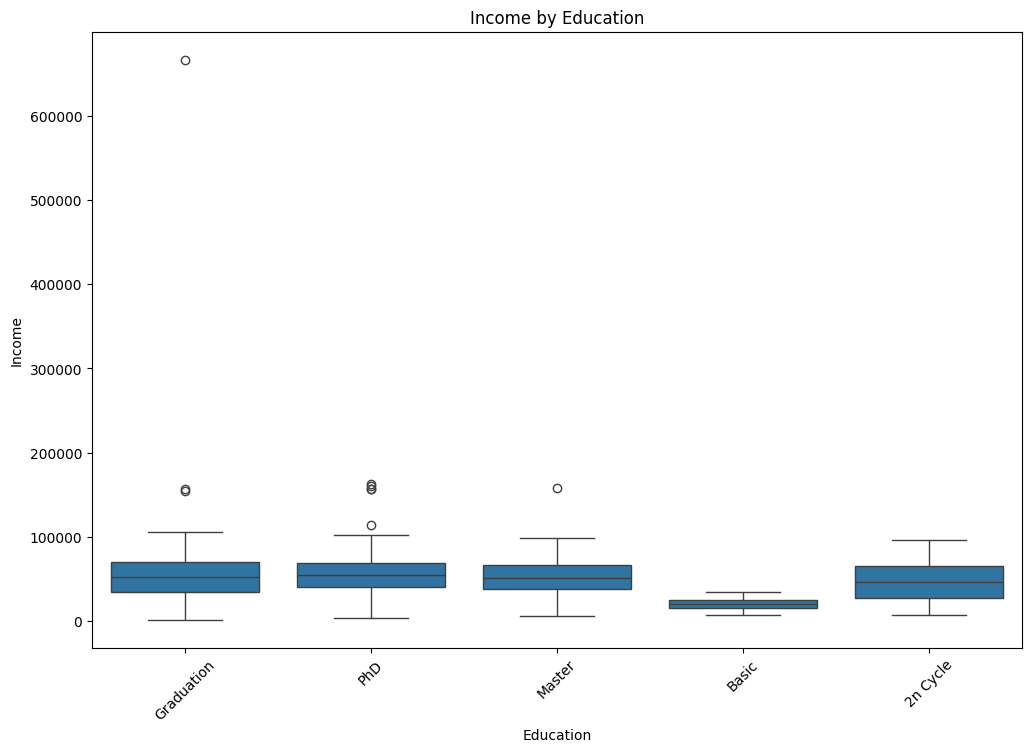

In [7]:
# Graph 3 -
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

**Insight** - we can see that the averge income for all the groups were close but those with basic education have sagnificantly lower income.(also we can see outliars)

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [8]:
# load the data
df = pd.read_csv(url)

In [9]:
# Scale the data using MinMaxScaler
encoder = OneHotEncoder(sparse_output=False)
scaler = MinMaxScaler()


numeric_vals = df.select_dtypes(include=['int64', 'float64']).columns # get the columns that has numeric values
exclude = ['ID','Dt_Customer','Education','Marital_Status','Z_Revenue','Z_CostContact'] # drop non numerical columns before scaling and constant values
numeric_vals = [col for col in numeric_vals if col not in exclude]
scaled = pd.DataFrame(scaler.fit_transform(df[numeric_vals]), columns=numeric_vals)


# Encode categorical variables
categorial_cols = ['Education', 'Marital_Status']
encoded = pd.DataFrame(encoder.fit_transform(df[categorial_cols]), columns=encoder.get_feature_names_out(categorial_cols)) #aply encoding for categrial columns
df1 = pd.concat([encoded, scaled], axis=1)
df1['acp']=df1['AcceptedCmp1'] + df1['AcceptedCmp2']+df1['AcceptedCmp3'] + df1['AcceptedCmp4']+df1['AcceptedCmp5']#combine sparse columns
df1 = df1.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis =1)
df1 = df1.dropna()
df1

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,acp
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0.0,0.0,0.0
2236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.0,1.0
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0.0,0.0,1.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0.0,0.0,0.0


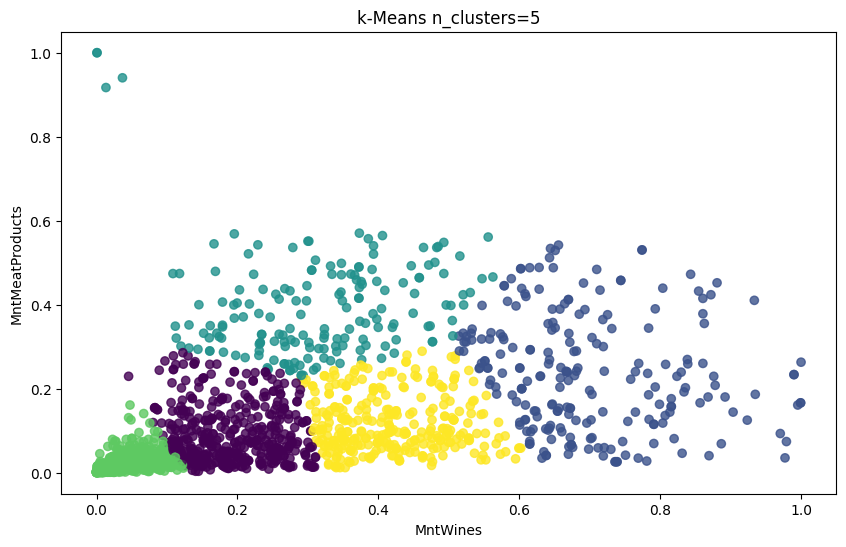

In [10]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
import copy
x = copy.copy(df1)
kmeans= KMeans(n_clusters=5,n_init =10,random_state=0)
# Visualize the clusters
x['Cluster'] = kmeans.fit_predict(x[['MntWines','MntMeatProducts']])
plt.figure(figsize=(10, 6))
plt.scatter(x['MntWines'], x['MntMeatProducts'], c=x['Cluster'], cmap='viridis', alpha=0.8)
plt.title('k-Means n_clusters=5')
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.show()


### Elbow

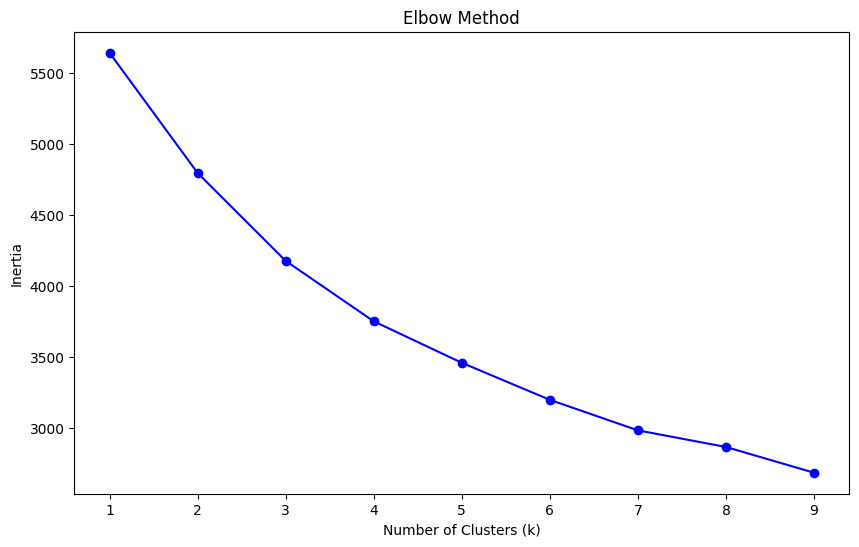

In [13]:
import copy
x = copy.copy(df1)
n_of_clusters = []
for i in range(1,10):
  kmeans= KMeans(n_clusters=i,n_init =10,random_state=0)
  kmeans.fit(x)
  n_of_clusters.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), n_of_clusters, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.xticks(range(1, 10))
plt.show()


### Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.2143000267319604
For n_clusters = 3 The average silhouette_score is : 0.1667005938462774
For n_clusters = 4 The average silhouette_score is : 0.20568682675807068
For n_clusters = 5 The average silhouette_score is : 0.20352563823280598
For n_clusters = 6 The average silhouette_score is : 0.2024284554493073


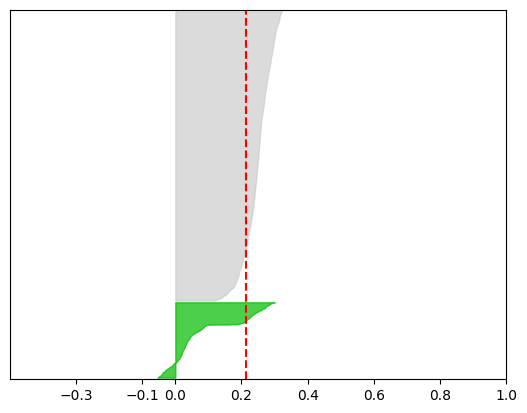

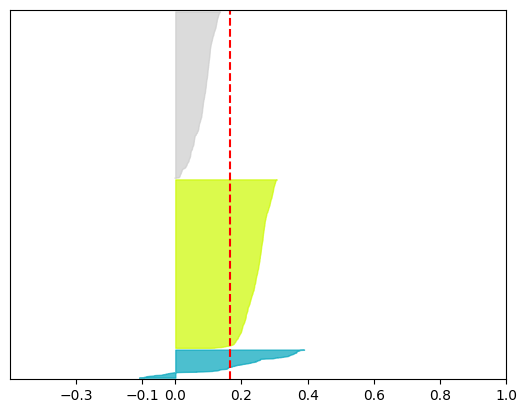

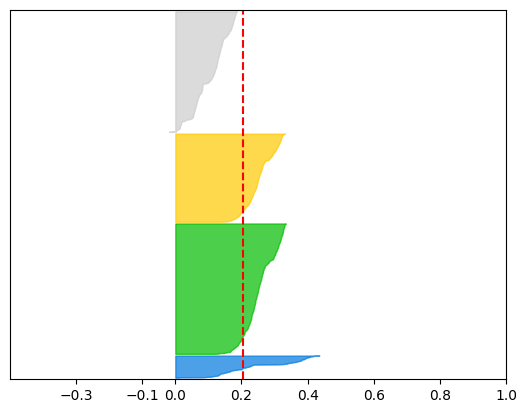

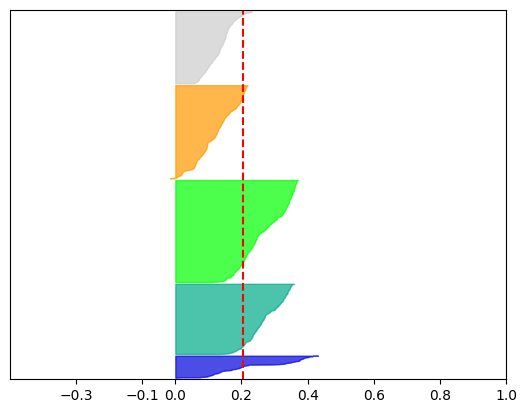

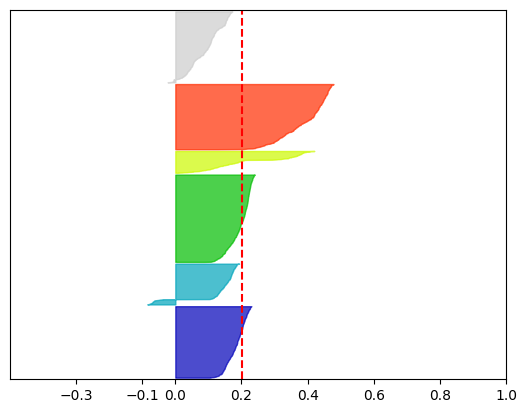

In [14]:
score= []
x = copy.copy(df1)
for i in range(2,7):
  fig, ax = plt.subplots()
  ax.set_xlim([-0.5,1])
  ax.set_ylim([0, len(x) + (i + 1) * 10])
  kmeans= KMeans(n_clusters=i,n_init =10,random_state=0)
  labels = kmeans.fit_predict(x)
  avg = silhouette_score(x, labels)
  score.append(avg)
  print("For n_clusters =",i,"The average silhouette_score is :",avg)

  sample_val = silhouette_samples(df1,labels)
  y_lower = 10
  for j in range(i):
    cluster_vals = sample_val[labels==j]
    cluster_vals.sort()
    y_upper = y_lower + cluster_vals.shape[0]
    color = cm.nipy_spectral(float(j+1) / (i))
    ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_vals,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
    y_lower = y_upper + 10
  ax.axvline(x=avg, color="red", linestyle="--")
  ax.set_yticks([])
  ax.set_xticks([-0.3,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## the best K is 2

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





Explained Variance for Each Principal Component:
Principal Component 1: 0.2088
Principal Component 2: 0.1359


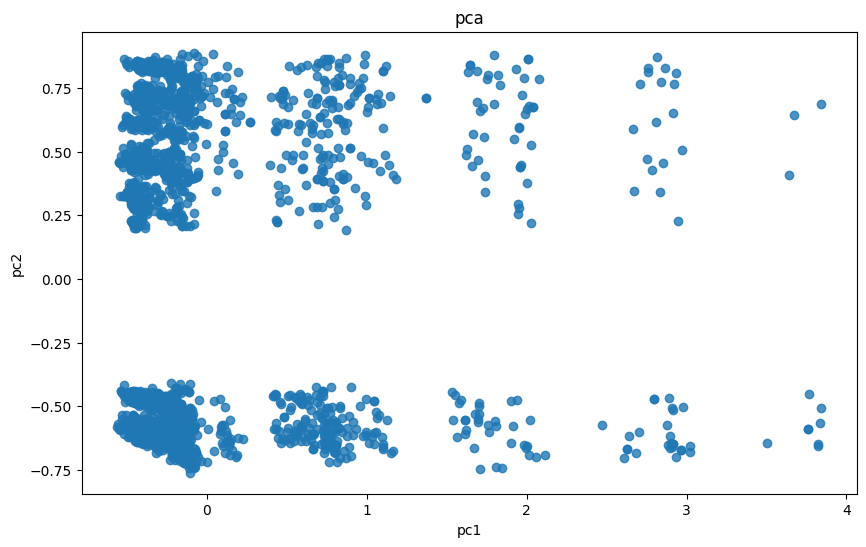

In [15]:
# Adjust n_components as needed
pca = PCA(n_components=2)
x = copy.copy(df1)
# Create a DataFrame with the principal components
pca_result = pca.fit_transform(x)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])



# Plotting the PCA
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.8)
plt.title('pca')
plt.xlabel('pc1')
plt.ylabel('pc2')

# Display explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for Each Principal Component:")
for i, ev in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {ev:.4f}")

**Q**: What is the variance explained in the 2 component PCA?

**A**: 20.88%  + 13.59% = 34.47%

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





In [16]:
pca_result = pca.fit_transform(df1)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

### Elbow

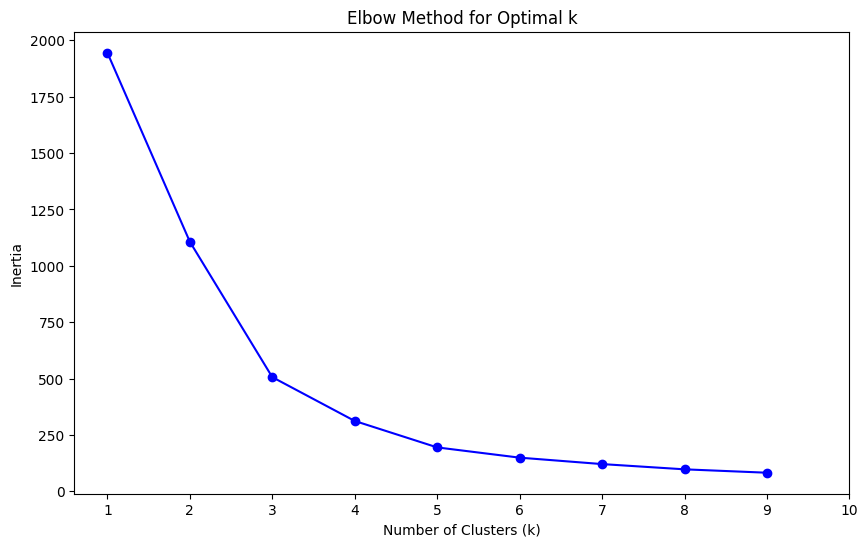

In [17]:
n_of_clusters = []
for i in range(1,10):
  kmeans= KMeans(n_clusters=i,n_init= 10,random_state=0)
  labels =kmeans.fit_predict(df_pca)
  n_of_clusters.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1,10), n_of_clusters, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

### visualization

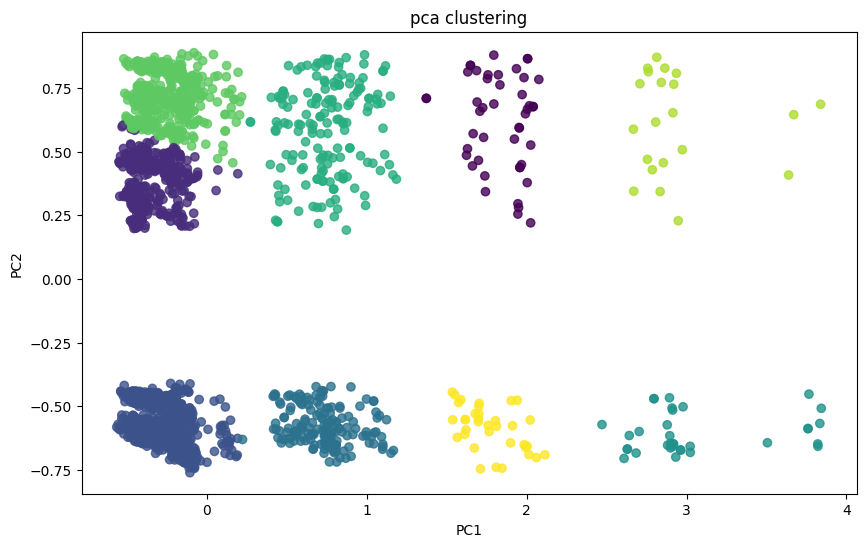

In [18]:
kmeans= KMeans(n_clusters=3,n_init=10,random_state=0)
lavels = kmeans.fit_predict(df_pca)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=labels, cmap='viridis', alpha=0.8)
plt.title('pca clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:The algorithem computes the distance of each point from the center of the cluster and it dosent take the shape into consideration.

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











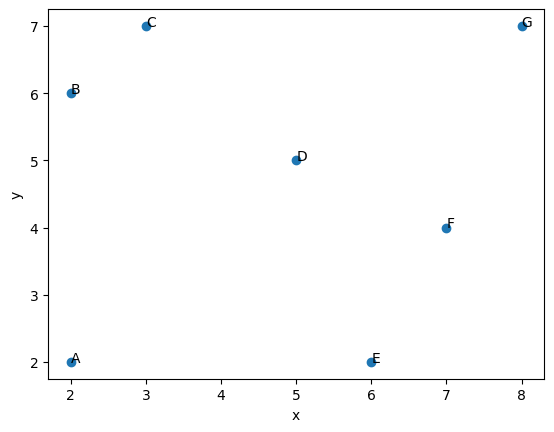

In [25]:
points = np.array([[2,2],[2,6],[3,7],[5,5],[6,2],[7,4],[8,7]])
labels = ['A','B','C','D','E','F','G']
plt.scatter(points[:,0],points[:,1])
for i, labels in enumerate(labels):
    plt.text(points[i][0], points[i][1], labels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



1) I chose (A,D,F) to be my centroids and the clusers where:  
1-A \
2-B,C,D \
3-E,F,G \
2) Choosing different initial cluster centers might kead to diferent final result because in each iteration of the algorithem we calculate the new centroids and because of it we might include different set of points that will belong to that cluser. \
3) When building a recomendation system for example we can use K-means clustering to cluser our users based on their characteristic to group them into clusters and give them simillar recomendations.

## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

because we are duing projection on 1 dimension, we will use only the first row of the matrix that has the largest coresponding  egienvalue (5): \
on (1,3): 1x1 + 2x3 =7 \
on (3,7): 1x3 +2x7 = 17